In [1]:
# Food Spoilage Prediction using Machine Learning
## 1. Creating Sample Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate synthetic supply chain data
df = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=1000, freq='D'),
    'temperature': np.random.normal(loc=22, scale=5, size=1000),
    'humidity': np.random.uniform(40, 80, size=1000),
    'transportation_time': np.random.randint(1, 72, size=1000),
    'packaging': np.random.choice(['Plastic', 'Cardboard', 'Glass'], size=1000)
})

In [3]:
# Save generated data to CSV
df.to_csv('supply_chain_data.csv', index=False)
print('Synthetic dataset created.')

Synthetic dataset created.


In [4]:
## 2. Data Exploration
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1000 non-null   datetime64[ns]
 1   temperature          1000 non-null   float64       
 2   humidity             1000 non-null   float64       
 3   transportation_time  1000 non-null   int64         
 4   packaging            1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 39.2+ KB
None


In [5]:
print("\nData Description:")
print(df.describe())


Data Description:
                      date  temperature     humidity  transportation_time
count                 1000  1000.000000  1000.000000          1000.000000
mean   2024-05-14 12:00:00    22.096660    60.145952            36.806000
min    2023-01-01 00:00:00     5.793663    40.128731             1.000000
25%    2023-09-07 18:00:00    18.762048    49.887965            19.000000
50%    2024-05-14 12:00:00    22.126503    60.645041            37.000000
75%    2025-01-19 06:00:00    25.239719    69.852745            54.000000
max    2025-09-26 00:00:00    41.263657    79.976549            71.000000
std                    NaN     4.896080    11.534273            20.189898


In [6]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
        date  temperature   humidity  transportation_time  packaging
0 2023-01-01    24.483571  46.699303                   62      Glass
1 2023-01-02    21.308678  44.182714                    8  Cardboard
2 2023-01-03    25.238443  65.457210                   43      Glass
3 2023-01-04    29.615149  68.259029                   20    Plastic
4 2023-01-05    20.829233  41.263446                   39    Plastic


In [7]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
date                   0
temperature            0
humidity               0
transportation_time    0
packaging              0
dtype: int64



Displaying Histograms for Feature Distribution...


<Figure size 1200x600 with 0 Axes>

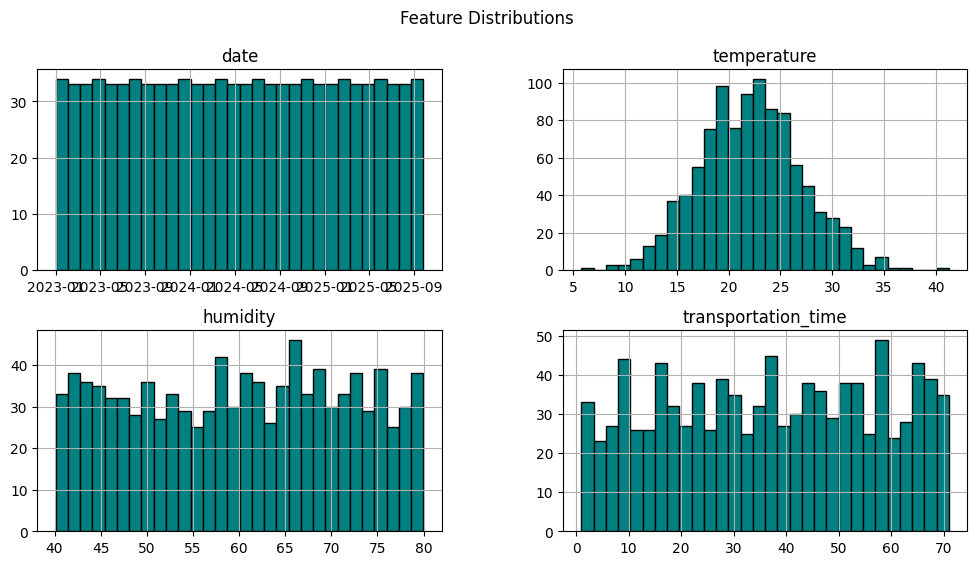

In [8]:
# Histograms for distribution
print("\nDisplaying Histograms for Feature Distribution...")
plt.figure(figsize=(12,6))
df.hist(bins=30, figsize=(12, 6), color='teal', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


Displaying Box Plot for Numerical Features...


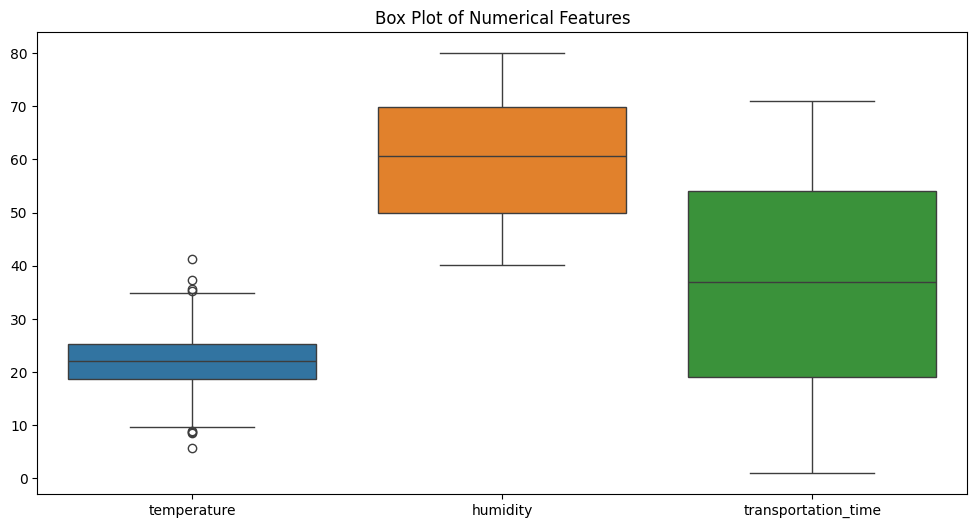

In [14]:
# Box plots to identify outliers
print("\nDisplaying Box Plot for Numerical Features...")
plt.figure(figsize=(12,6))
plt.title('Box Plot of Numerical Features')
sns.boxplot(data=df[['temperature','humidity','transportation_time']])
plt.show()


Displaying Correlation Heatmap...
Selected numeric columns for correlation: ['temperature', 'humidity', 'transportation_time']
Correlation matrix computed.


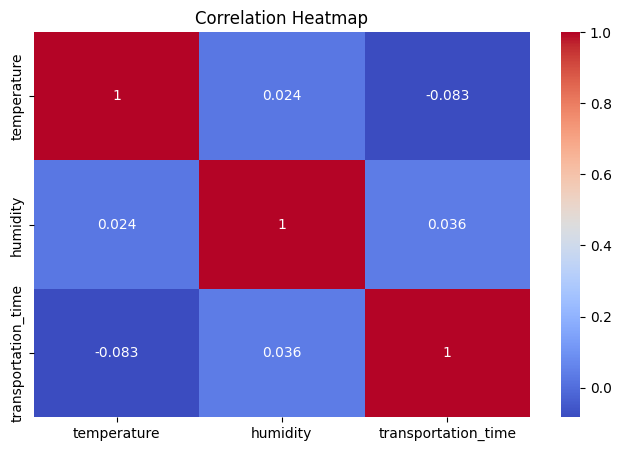

In [16]:
# Correlation heatmap
print("\nDisplaying Correlation Heatmap...")
# SELECT NUMERIC COLUMNS ONLY FOR CORRELATION
numeric_df = df.select_dtypes(include=['number'])
print("Selected numeric columns for correlation:", numeric_df.columns.tolist())
plt.figure(figsize=(8,5))
corr = numeric_df.corr()
print("Correlation matrix computed.")
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
## 3. Data Preprocessing
print("\nPerforming One-Hot Encoding for 'packaging'...")
df = pd.get_dummies(df, columns=['packaging'], drop_first=True)

print("Normalizing Numeric Features...")
scaler = MinMaxScaler()
df[['temperature', 'humidity', 'transportation_time']] = scaler.fit_transform(df[['temperature', 'humidity', 'transportation_time']])


Performing One-Hot Encoding for 'packaging'...
Normalizing Numeric Features...


In [18]:
# Save cleaned dataset
df.to_csv('cleaned_supply_chain_data.csv', index=False)
print('Data preprocessing completed.')

Data preprocessing completed.
